In [1]:
import matplotlib.pyplot as plt
import numpy as np

n = int(60)

# Define os valores para o cabeçalho
header_values = [0.1,0.5,0.75,1.0,1.25,1.5,2.0,2.5,3.0]  # Exemplo, ajuste conforme necessário

dataLR = []
dataMA = []

for delta in header_values:
    filenameLR = "datafilesfidelLR_kitaev_n_"+str(n)+"_tau_120.0_delta_"+str(delta)+'.CSV'
    filenameMA = "datafilesfidelMA_kitaev_n_"+str(n)+"_tau_120.0_delta_"+str(delta)+'.CSV'
    dataLR.append(np.loadtxt('Fidelity Minimal Action Kitaev/'+filenameLR))
    dataMA.append(np.loadtxt('Fidelity Minimal Action Kitaev/'+filenameMA))

In [2]:
font = {
        'weight' : 'bold',
        'size'   : 20}
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
plt.rc('font', **font)

In [3]:
dataLR = np.transpose(dataLR)
dataMA = np.transpose(dataMA)

lines = [49,99,149,199]
#lines = [49,99]
#lines = [149,199]

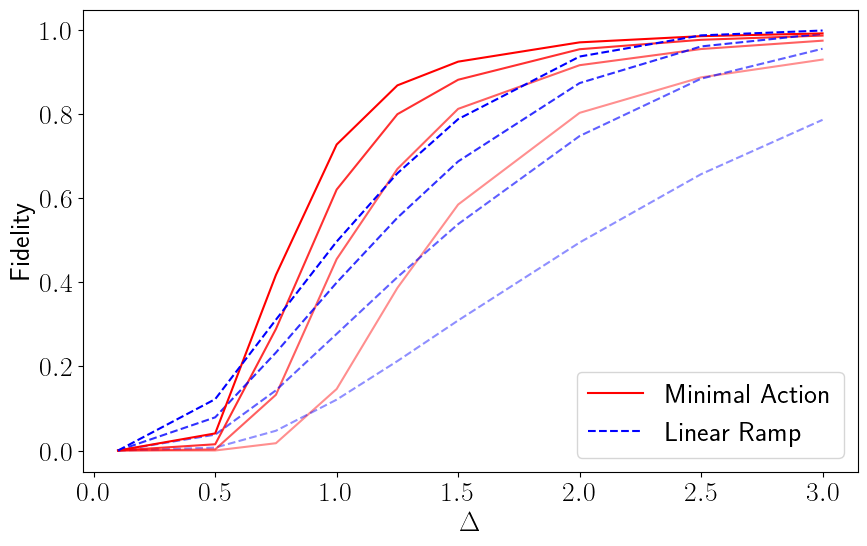

In [4]:
# Plotando
plt.figure(figsize=(10, 6))
for i in range(len(lines)):
    intensity = (i+1)*0.75/len(lines) + 0.25
    plt.plot(header_values, dataMA[lines[i]],color="red",alpha=intensity)
    plt.plot(header_values, dataLR[lines[i]],color="blue",alpha=intensity, linestyle="dashed")

plt.plot([], [],color="red", label='Minimal Action')
plt.plot([], [],color="blue", linestyle="dashed", label='Linear Ramp')
plt.xlabel("$ \\Delta $")
plt.ylabel("Fidelity")
plt.legend(loc="lower right")
#plt.axvline(x = 1.05, color='green')
plt.show()

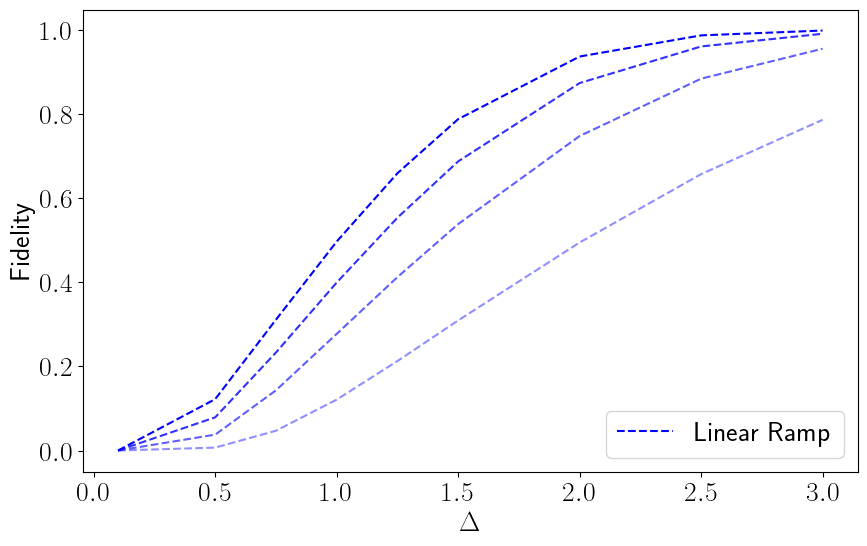

In [5]:
# Plotando
plt.figure(figsize=(10, 6))
for i in range(len(lines)):
    intensity = (i+1)*0.75/len(lines) + 0.25
    #plt.plot(header_values, dataMA[lines[i]],color="red",alpha=intensity)
    plt.plot(header_values, dataLR[lines[i]],color="blue",alpha=intensity, linestyle="dashed")

#plt.plot([], [],color="red", label='Minimal Action')
plt.plot([], [],color="blue", linestyle="dashed", label='Linear Ramp')
plt.xlabel("$ \\Delta $")
plt.ylabel("Fidelity")
plt.legend(loc="lower right")
#plt.axvline(x = 1.05, color='green')
plt.show()

In [6]:
import numpy as np
from scipy.interpolate import CubicSpline

def find_intersections_spline(x1, y1, x2, y2):
    # Imprimir a função de interpolação usada
    print("Usando interpolação cúbica com `scipy.interpolate.CubicSpline`.")

    # Interpolar ambas as curvas usando splines cúbicos
    spline1 = CubicSpline(x1, y1)
    spline2 = CubicSpline(x2, y2)

    # Escolher um domínio comum para ambas as curvas
    x_common = np.linspace(max(min(x1), min(x2)), min(max(x1), max(x2)), 1000)
    y1_interp = spline1(x_common)
    y2_interp = spline2(x_common)

    # Calcular a diferença entre as duas curvas
    difference = y1_interp - y2_interp

    # Encontrar os índices onde ocorre a mudança de sinal
    indices = np.where(np.diff(np.sign(difference)))[0]

    # Coordenadas dos pontos de interseção
    x_intersections = x_common[indices]
    y_intersections = y1_interp[indices]

    return x_intersections, y_intersections


In [7]:
print("$ n={} $".format(n))
print("(t, delta, fidel):")
for i in lines:
    x_intersections, y_intersections = find_intersections_spline(header_values, dataLR[i], header_values, dataMA[i])
    for x, y in zip(x_intersections, y_intersections):
        print(f"({((i+1))/200:.2f}tau, {x:.2f}, {y:.2f})")

$ n=60 $
(t, delta, fidel):
Usando interpolação cúbica com `scipy.interpolate.CubicSpline`.
(0.25tau, 0.10, 0.00)
(0.25tau, 0.45, 0.00)
(0.25tau, 0.93, 0.10)
Usando interpolação cúbica com `scipy.interpolate.CubicSpline`.
(0.50tau, 0.10, 0.00)
(0.50tau, 0.35, 0.00)
(0.50tau, 0.77, 0.15)
Usando interpolação cúbica com `scipy.interpolate.CubicSpline`.
(0.75tau, 0.66, 0.17)
(0.75tau, 2.79, 0.98)
Usando interpolação cúbica com `scipy.interpolate.CubicSpline`.
(1.00tau, 0.61, 0.20)
(1.00tau, 2.44, 0.98)
